# **Used Car Price Predictions in India**
Kaggle Dataset:

https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction/data

Part 1: Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Importing Dataset

In [2]:
train_df = pd.read_csv("train-data.csv")
# test_df = pd.read_csv("test-data.csv")

train_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
#test_df.head()

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
#test_df.info()

In [6]:
train_df.describe(include='number')

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
#test_df.describe(include='number')

In [8]:
# Description of Object Columns:
train_df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


In [9]:
#test_df.describe(include='object')

In [10]:
train_df.isna().sum()
#test_df.isna().sum()
train_df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)
# test_df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)
train_df.duplicated().sum()
#test_df.duplicated().sum()

0

In [11]:
train_df['Mileage'] = train_df['Mileage'].str.split(expand=True)[0].astype(float)
train_df['Engine'] = train_df['Engine'].str.split(expand=True)[0].astype(float)
train_df['Power'] = train_df['Power'].replace('null bhp',None)
train_df['Power'] = train_df['Power'].str.split(expand=True)[0].astype(float)

# test_df['Mileage'] = test_df['Mileage'].str.split(expand=True)[0].astype(float)
# test_df['Engine'] = test_df['Engine'].str.split(expand=True)[0].astype(float)
# test_df['Power'] = test_df['Power'].replace('null bhp',None)
# test_df['Power'] = test_df['Power'].str.split(expand=True)[0].astype(float)

In [12]:
train_df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [13]:
train_df['Mileage'].fillna(train_df['Mileage'].mean(), inplace=True)
train_df['Engine'].fillna(train_df['Engine'].mean(), inplace=True)
train_df['Power'].fillna(train_df['Power'].mean(), inplace=True)
train_df['Seats'].fillna(train_df['Seats'].mean(), inplace=True)

# test_df['Mileage'].fillna(test_df['Mileage'].mean(), inplace=True)
# test_df['Engine'].fillna(test_df['Engine'].mean(), inplace=True)
# test_df['Power'].fillna(test_df['Power'].mean(), inplace=True)
# test_df['Seats'].fillna(test_df['Seats'].mean(), inplace=True)

train_df.isna().sum()
#test_df.isna().sum()
train_df.shape
# test_df.shape

(6019, 12)

In [14]:
z_scores_train = stats.zscore(train_df["Kilometers_Driven"])
# z_scores_test = stats.zscore(test_df["Kilometers_Driven"])
threshold = 3
outliers_train = train_df['Kilometers_Driven'][abs(z_scores_train) > threshold]
# outliers_test = test_df['Kilometers_Driven'][abs(z_scores_test) > threshold]

outliers_train
# outliers_test

340      775000
358      620000
1860     720000
2328    6500000
2823     480000
3092     480000
4491     445000
Name: Kilometers_Driven, dtype: int64

In [15]:
train_df = train_df[train_df["Kilometers_Driven"] <= 300000]
train_df["Seats"].min()
train_df = train_df[train_df['Seats'] != 0]
train_df['Name'].nunique()

1874

In [16]:
train_df['Company'] = train_df['Name'].str.split(expand=True)[0].str.lower()
train_df['Model'] = train_df['Name'].str.split().str[0:2].str.join(' ').str.lower()
train_df.drop(columns = ['Name'],inplace = True)
train_df['Company'].nunique() , train_df['Model'].nunique()

# test_df['Company'] = test_df['Name'].str.split(expand=True)[0].str.lower()
# test_df['Model'] = test_df['Name'].str.split().str[0:2].str.join(' ').str.lower()
# test_df.drop(columns = ['Name'],inplace = True)
# test_df['Company'].nunique() , test_df['Model'].nunique()

(30, 215)

In [17]:
train_df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,maruti,maruti wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,hyundai,hyundai creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,honda,honda jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,maruti,maruti ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,audi,audi a4


Data Visualization

Key Notes:
*   Price is listed in Lakhs. We are looking at used cars in India, where the currency is the Indian Rupee, and the metrics of cost are in lakhs and crores, rather than millions or thousands.

*   1 USD = ~80 INR
*   100,000 INR = 1 Lakh INR
*   10,000,000 INR = 1000 Lakhs = 1 Crore

In [18]:
new_order = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission',
             'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
train_df = train_df.reindex(columns=new_order)

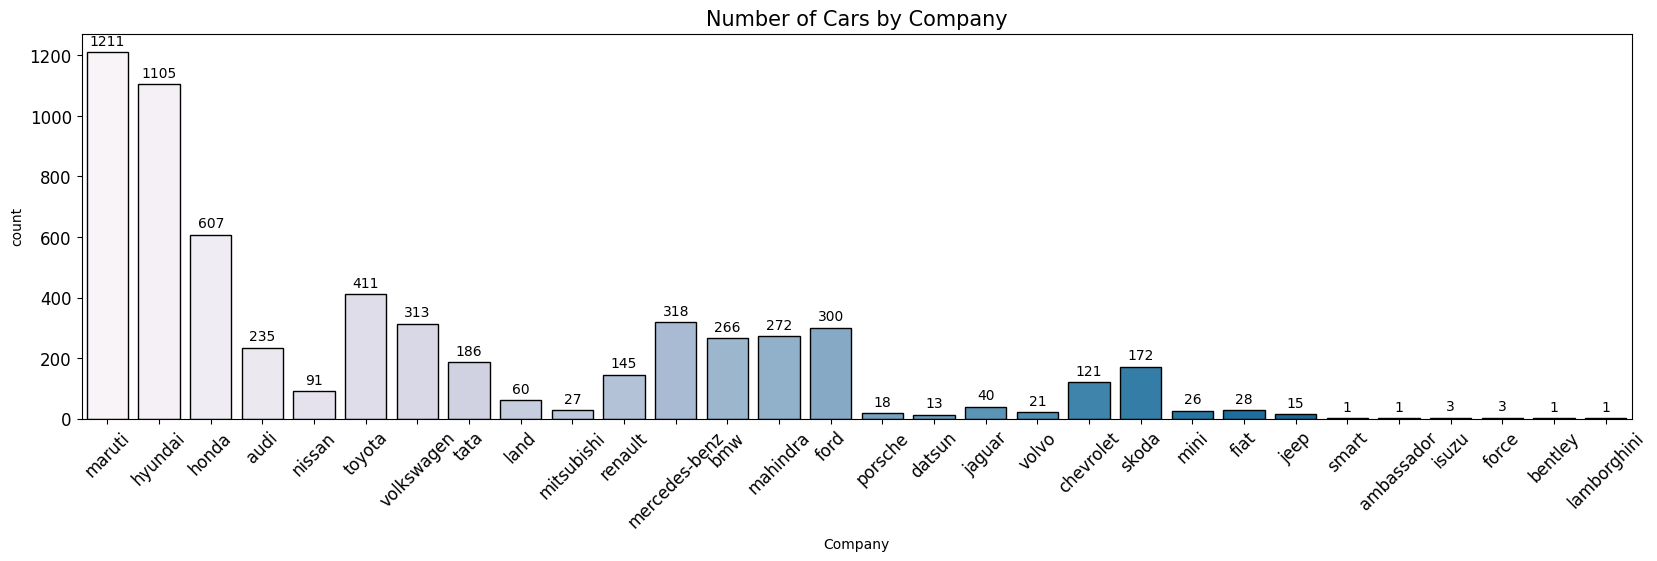

In [19]:
plt.figure(figsize=(20, 5))
graph = sns.countplot(data=train_df, x='Company', palette='PuBu', edgecolor='black')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Setting the title of the plot
plt.title('Number of Cars by Company', fontsize=15)

# Adding bar labels to show the count on top of each bar
for container in graph.containers:
    graph.bar_label(container, padding=3)

# Show the plot
plt.show()

In [20]:
train_df.Model.value_counts()
threshold = 10
counts = train_df['Model'].value_counts()
filtered_models = counts[counts >= threshold].index.tolist()
df = train_df[train_df['Model'].isin(filtered_models)]

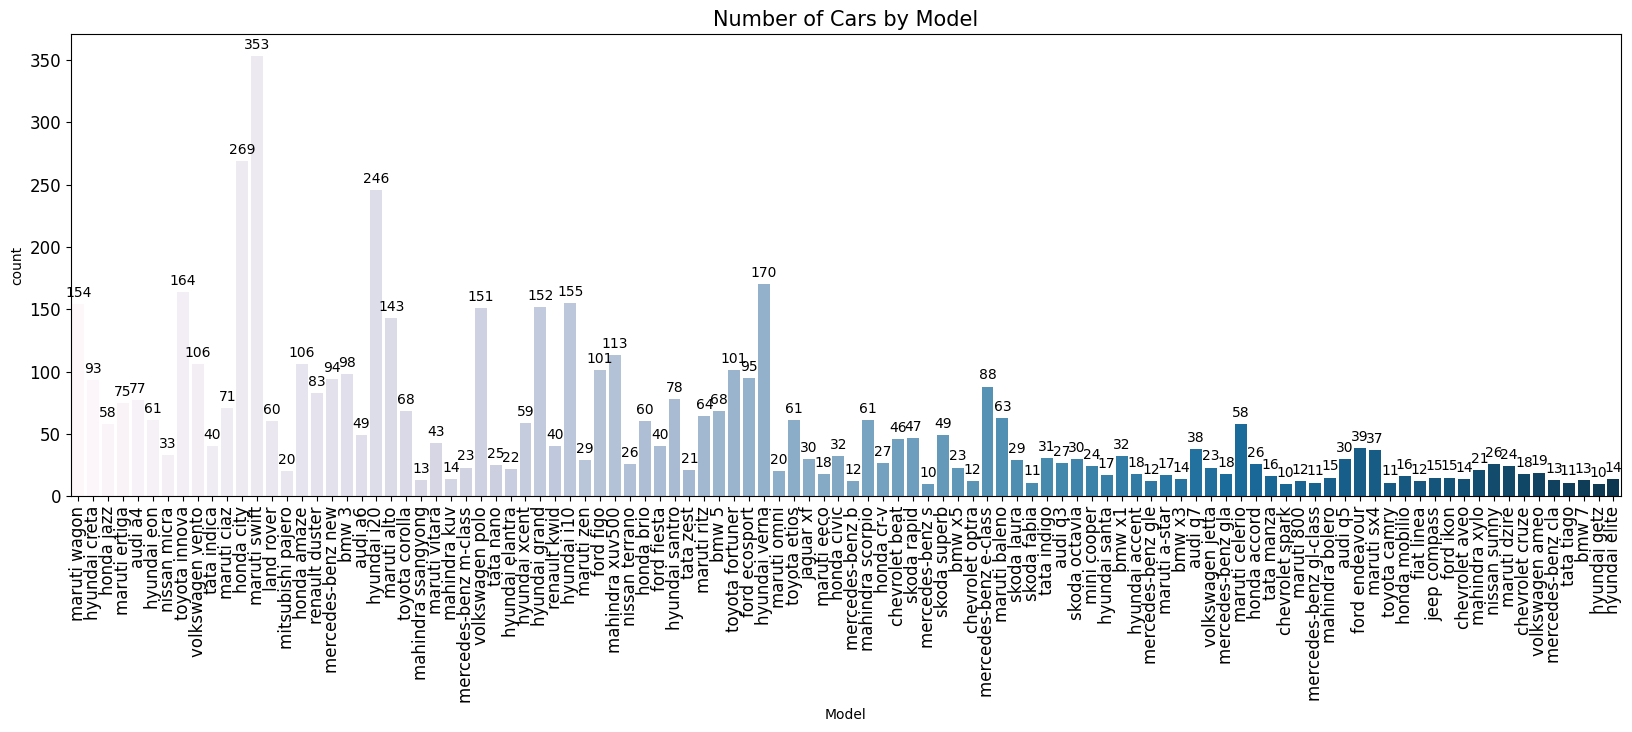

In [21]:
# Setting the figure size and resolution
plt.figure(figsize=(20, 6), dpi=100)
graph = sns.countplot(data=df, x='Model', palette='PuBu')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Number of Cars by Model', fontsize=15)

# Adding labels on top of each bar to display the count
for container in graph.containers:
    graph.bar_label(container, padding=3) 

# Show the plot
plt.show()

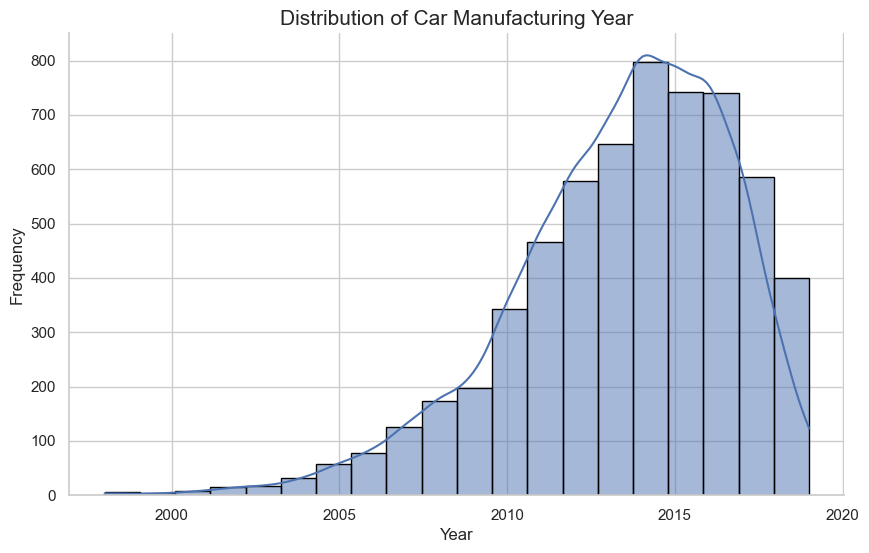

In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Year'], bins=20, palette='PuBu', edgecolor='black', kde=True)
plt.title('Distribution of Car Manufacturing Year', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Removing spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

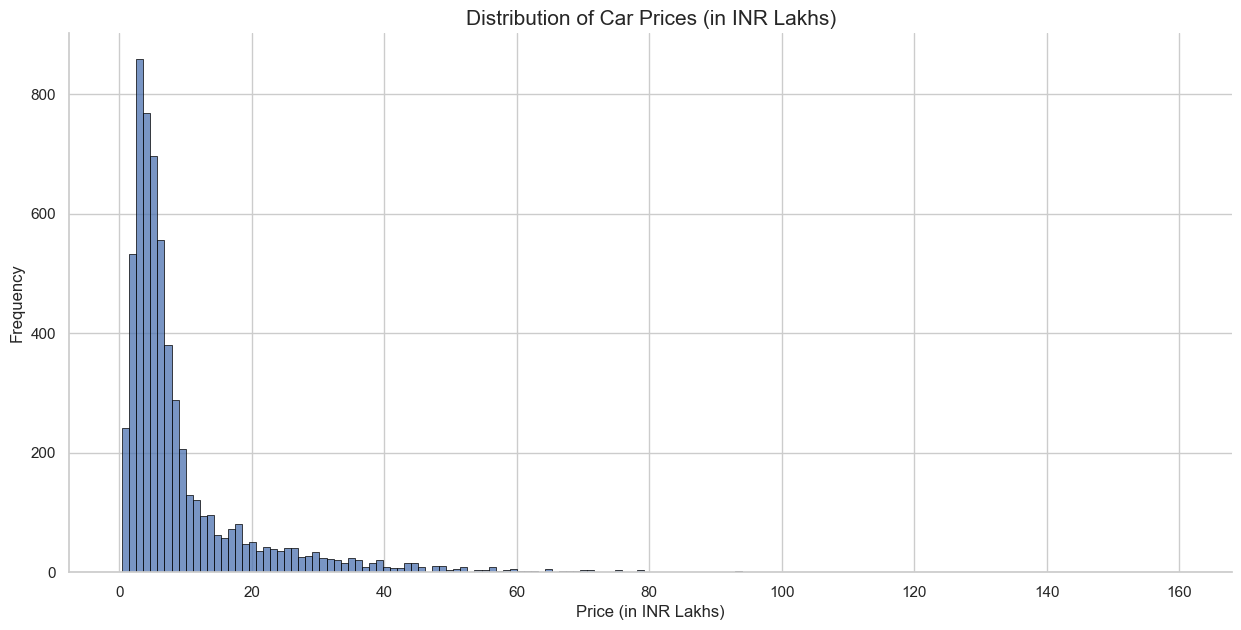

In [23]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(15, 7))
sns.histplot(train_df['Price'], bins=150, palette='PuBu', edgecolor='black')
plt.title('Distribution of Car Prices (in INR Lakhs)', fontsize=15)
plt.xlabel('Price (in INR Lakhs)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Removing spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

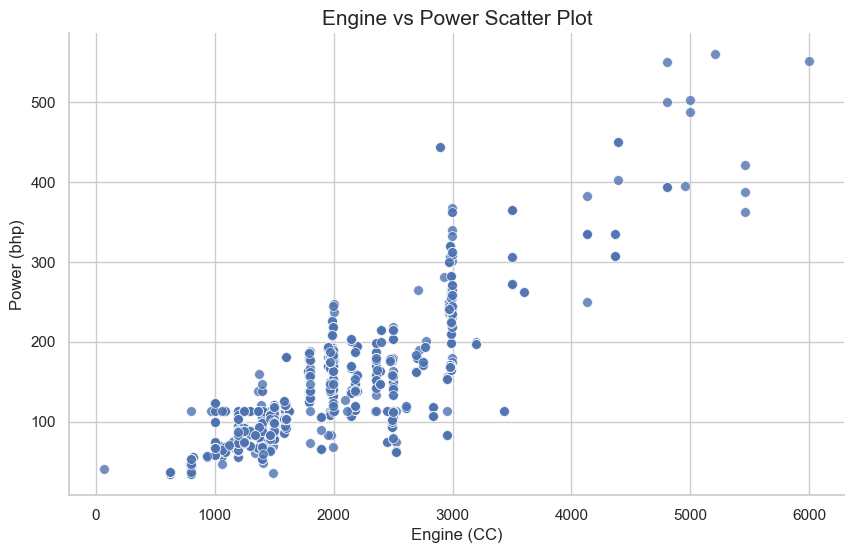

In [24]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Engine', y='Power', alpha=0.8, palette='PuBu', s=50)  # Adjust `s` for size

# Customizing the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding title and labels
plt.title('Engine vs Power Scatter Plot', fontsize=15)
plt.xlabel('Engine (CC)', fontsize=12)
plt.ylabel('Power (bhp)', fontsize=12)

# Show the plot
plt.show()

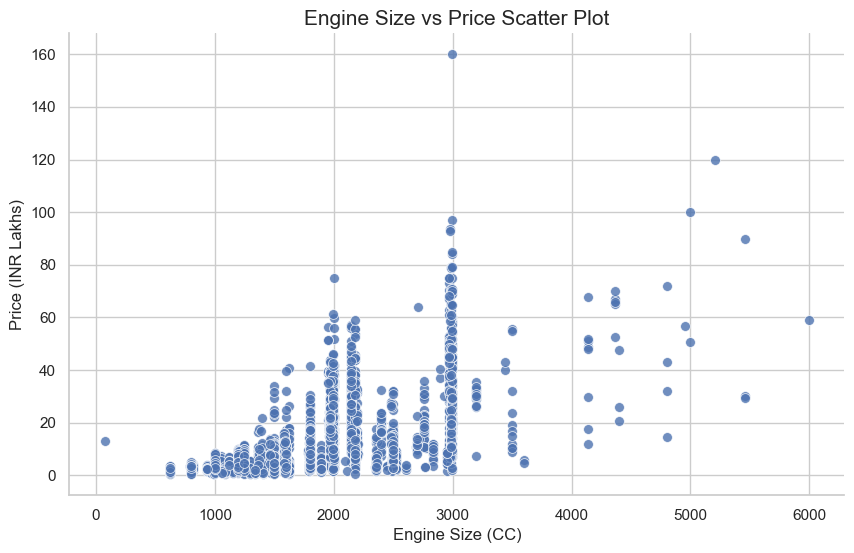

In [25]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='Engine', y='Price', alpha=0.8, palette='PuBu', s=50)


# Customizing the spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding title and labels
plt.title('Engine Size vs Price Scatter Plot', fontsize=15)
plt.xlabel('Engine Size (CC)', fontsize=12)
plt.ylabel('Price (INR Lakhs)', fontsize=12)

# Show the plot
plt.show()

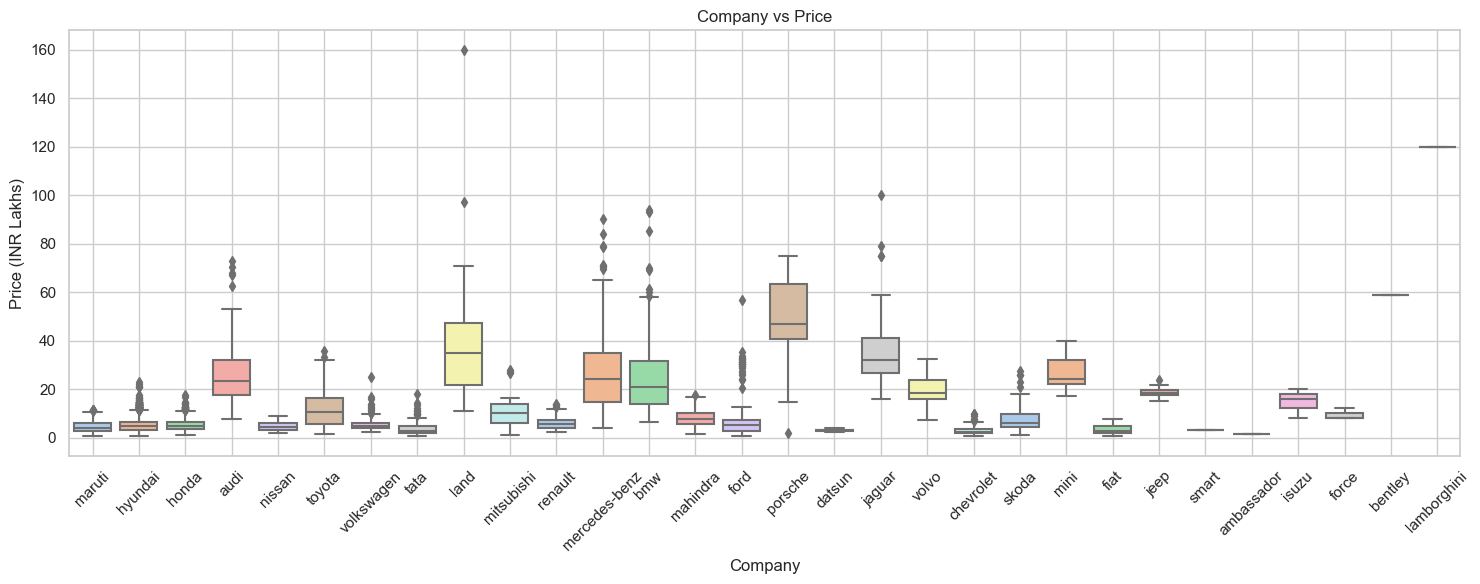

In [26]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Company', y='Price', data=train_df, palette='pastel')
plt.title('Company vs Price')
plt.xlabel('Company')
plt.ylabel('Price (INR Lakhs)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

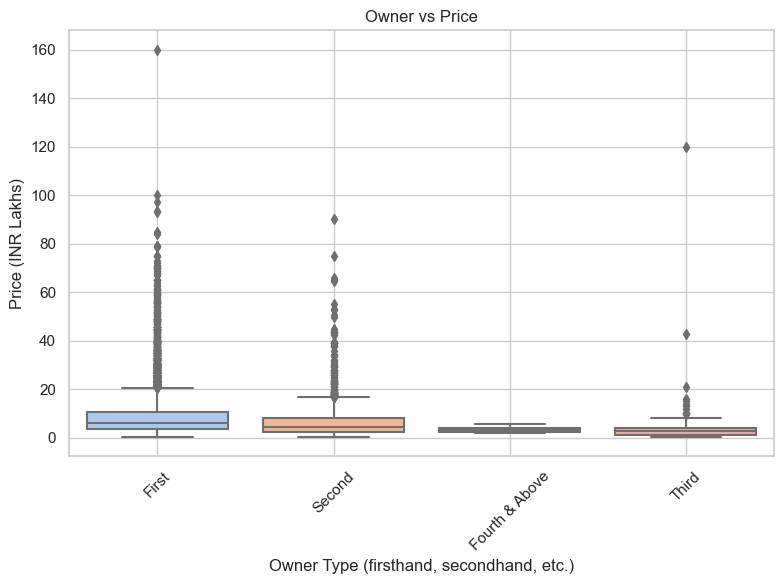

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Owner_Type', y='Price', data=train_df, palette='pastel')
plt.title('Owner vs Price')
plt.xlabel('Owner Type (firsthand, secondhand, etc.)')
plt.ylabel('Price (INR Lakhs)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

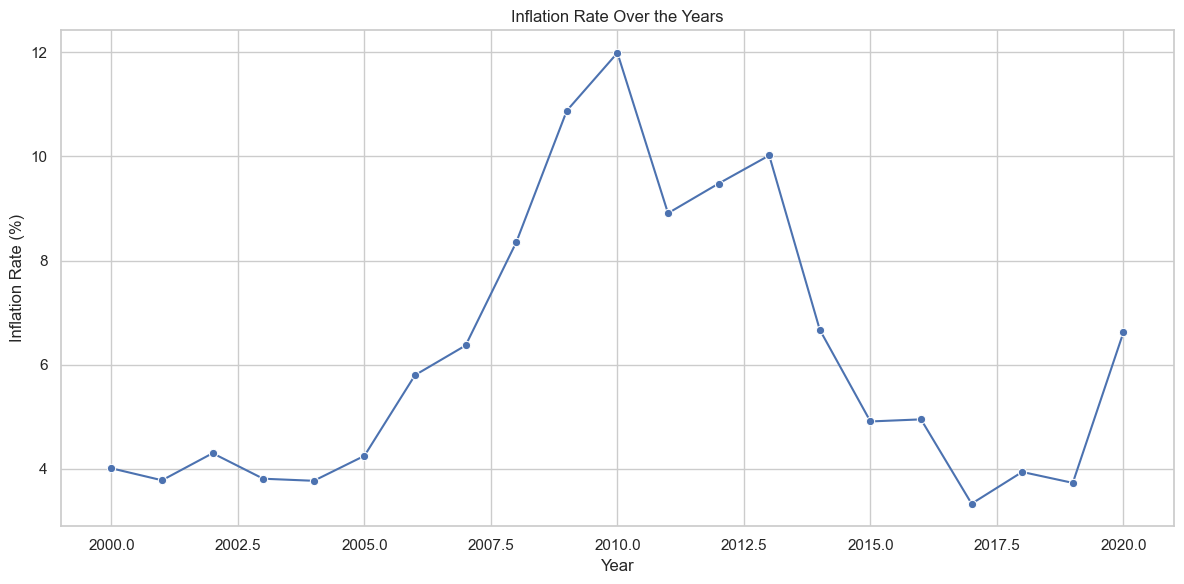

In [28]:
inflation_data = {
    'year': [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
    'inflation_rate': [6.62, 3.73, 3.94, 3.33, 4.95, 4.91, 6.67, 10.02, 9.48, 8.91, 11.99, 10.88, 8.35, 6.37, 5.80, 4.25, 3.77, 3.81, 4.30, 3.78, 4.01]
}
df_inflation = pd.DataFrame(inflation_data)

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='inflation_rate', data=df_inflation, marker='o', color='b')
plt.title('Inflation Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

Data Preparation

In [29]:
CatCols = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission']

df = pd.get_dummies(df, columns=CatCols, drop_first=True)
df.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_bmw,Company_chevrolet,Company_fiat,...,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,0,0,...,0,0,0,0,1,0,1,0,0,0


Linear Regression (Prediction)

In [30]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score = list()
test_score = list()

train_score.append(lin_reg.score(X_train,y_train))
test_score.append(lin_reg.score(X_test,y_test))

MAE: 2.3443923440288073
MSE: 16.764687185891525
RMSE: 4.094470318110942
R2 Score: 0.8298880576444078


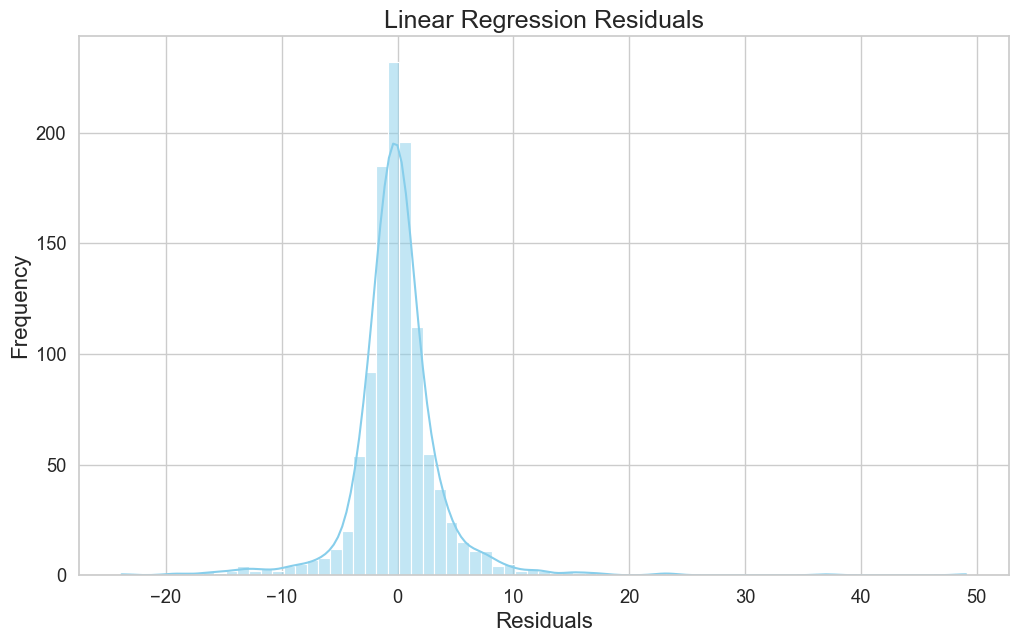

/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


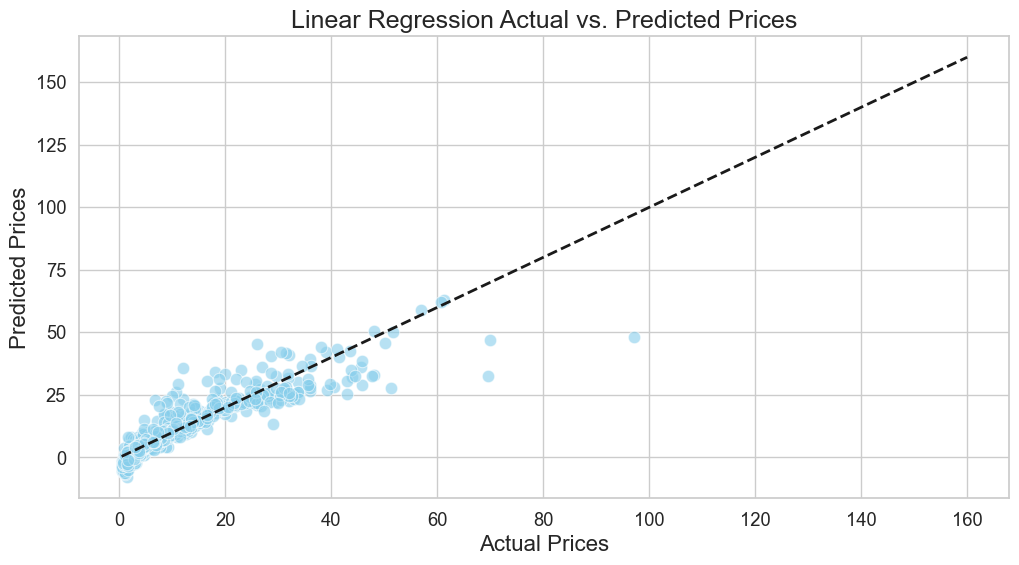

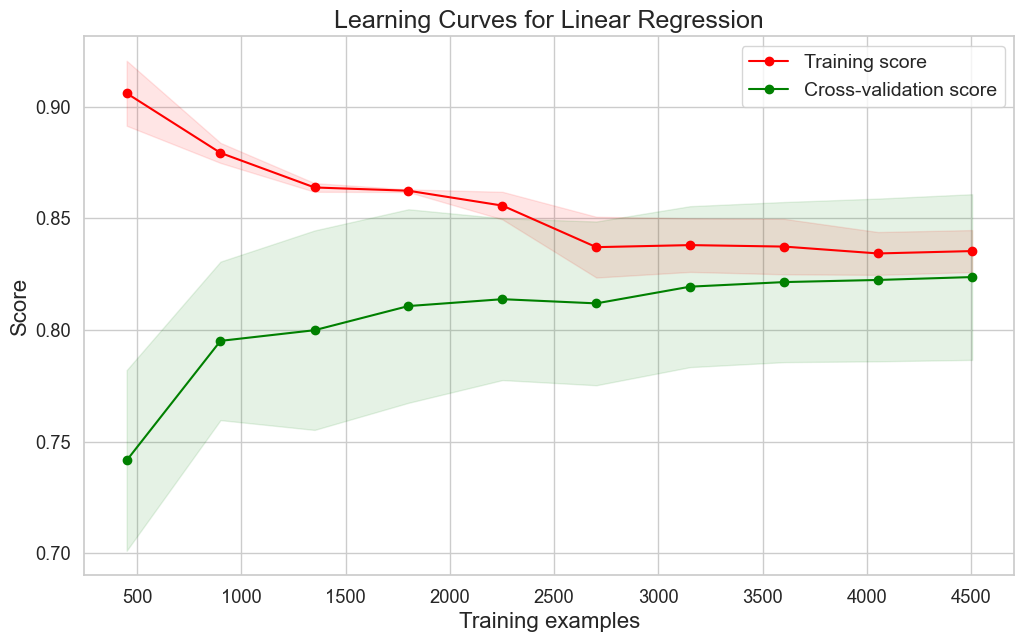

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Histogram of Residuals
residuals = y_test - y_pred
plt.figure(figsize=(12, 7))
sns.histplot(residuals, kde=True, color='skyblue', binwidth=1.0)
plt.title('Linear Regression Residuals', fontsize=18)
plt.xlabel('Residuals', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(True)
plt.show()

# Scatter Plot of Predictions vs Actual with adjusted intercept line
plt.figure(figsize=(12, 6))
sns.scatterplot(y_test, y_pred, alpha=0.6, edgecolor='w', s=80, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Adjusted line
plt.title('Linear Regression Actual vs. Predicted Prices', fontsize=18)
plt.xlabel('Actual Prices', fontsize=16)
plt.ylabel('Predicted Prices', fontsize=16)
plt.grid(True)
plt.show()

# Learning Curves
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

train_sizes, train_scores, test_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='r2')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='red')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='green')
plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-validation score')
plt.title('Learning Curves for Linear Regression', fontsize=18)
plt.xlabel('Training examples', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
plt.show()


Ridge Regression

In [35]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(ridge.score(X_train,y_train))
test_score.append(ridge.score(X_test,y_test))

MAE: 2.350782727222452
MSE: 16.65612725663986
RMSE: 4.081191891670846
R2 Score: 0.8309896195299482


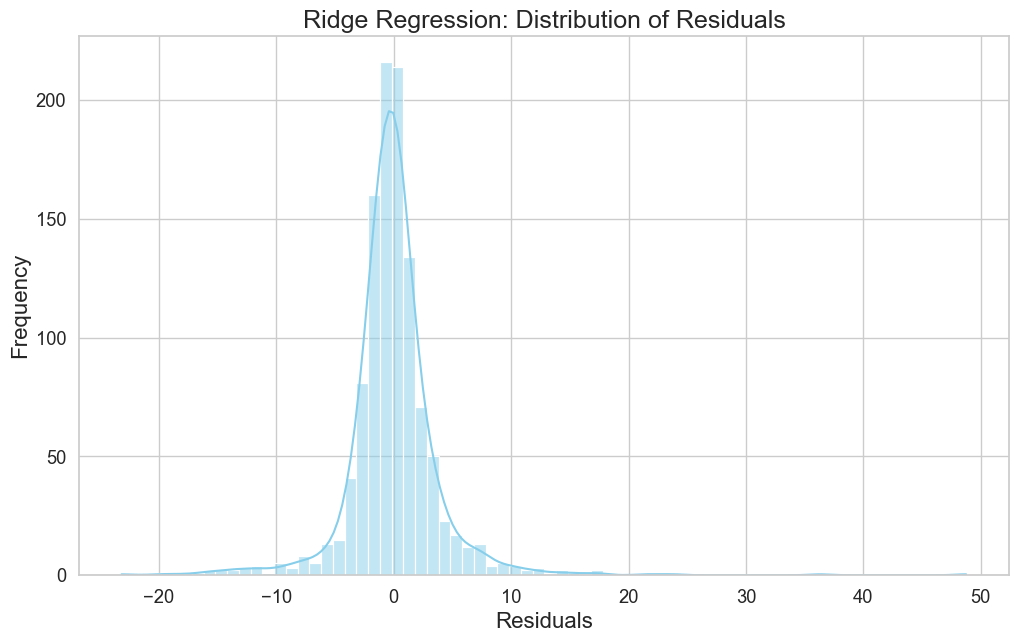

/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


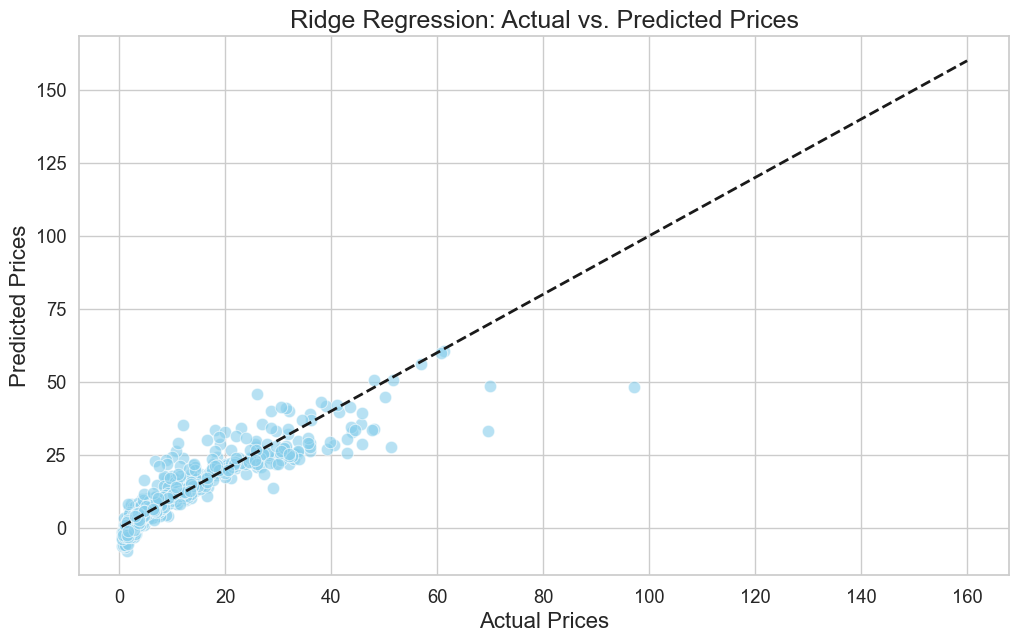

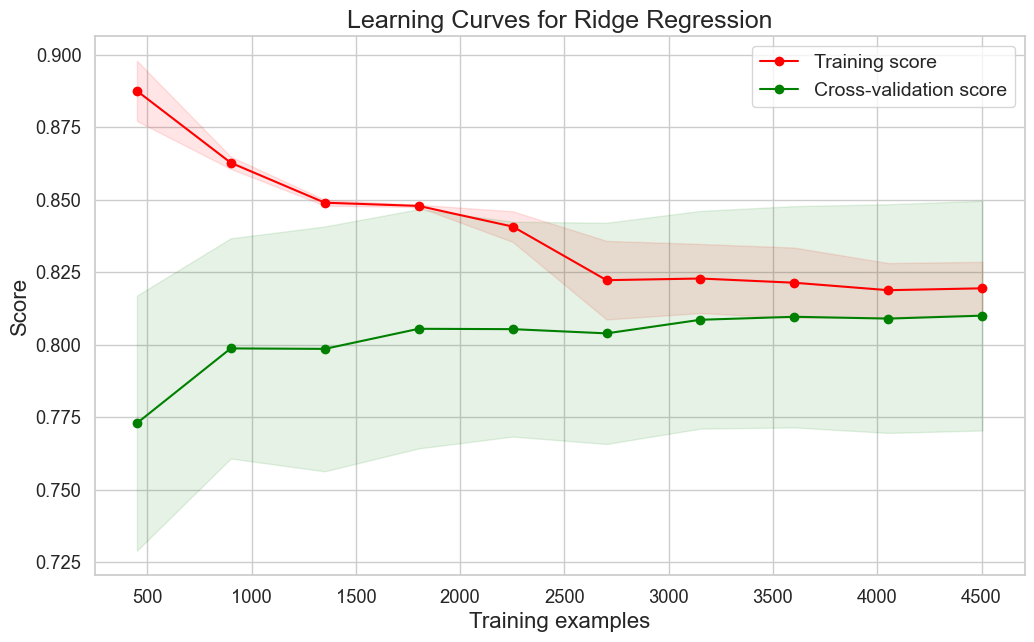

In [36]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Calculate residuals
residuals = y_test - predictions

# Histogram of Residuals
plt.figure(figsize=(12, 7))
sns.histplot(residuals, kde=True, color='skyblue', binwidth=1.0)
plt.title('Ridge Regression: Distribution of Residuals', fontsize=18)
plt.xlabel('Residuals', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(True)
plt.show()

# Scatter Plot of Predictions vs Actual
plt.figure(figsize=(12, 7))
sns.scatterplot(y_test, predictions, alpha=0.6, edgecolor='w', s=80, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.title('Ridge Regression: Actual vs. Predicted Prices', fontsize=18)
plt.xlabel('Actual Prices', fontsize=16)
plt.ylabel('Predicted Prices', fontsize=16)
plt.grid(True)
plt.show()

lasso = Lasso(alpha=0.01)  

# Settings for the learning curves
train_sizes, train_scores, test_scores = learning_curve(
    lasso, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5, 
    scoring='r2', 
    n_jobs=-1  
)

# Calculate the average and standard deviation of the training and test set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="red")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="green")
plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")

plt.title("Learning Curves for Ridge Regression", fontsize=18)
plt.xlabel("Training examples", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True)
plt.show()

Lasso Regression

In [37]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(lasso.score(X_train,y_train))
test_score.append(lasso.score(X_test,y_test))

MAE: 3.634647082133724
MSE: 32.06944853117678
RMSE: 5.662989363505531
R2 Score: 0.6745900403974006


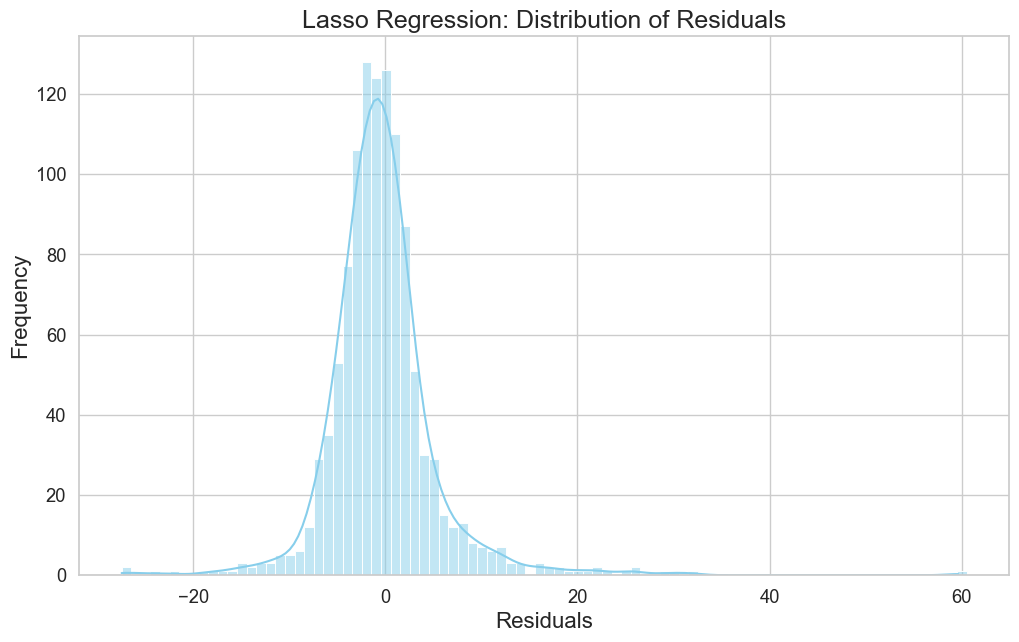

/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


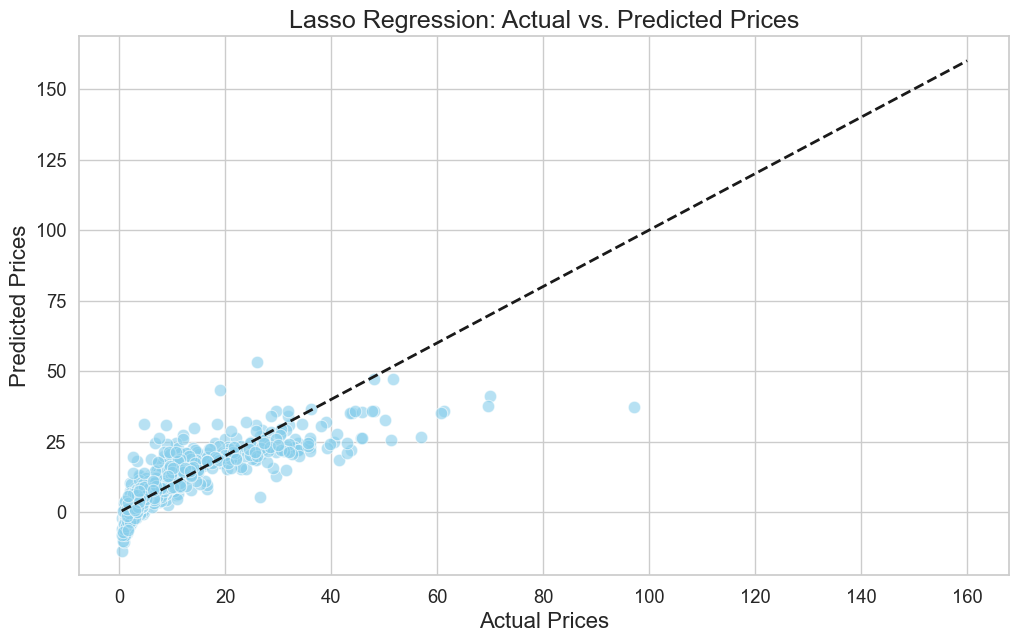

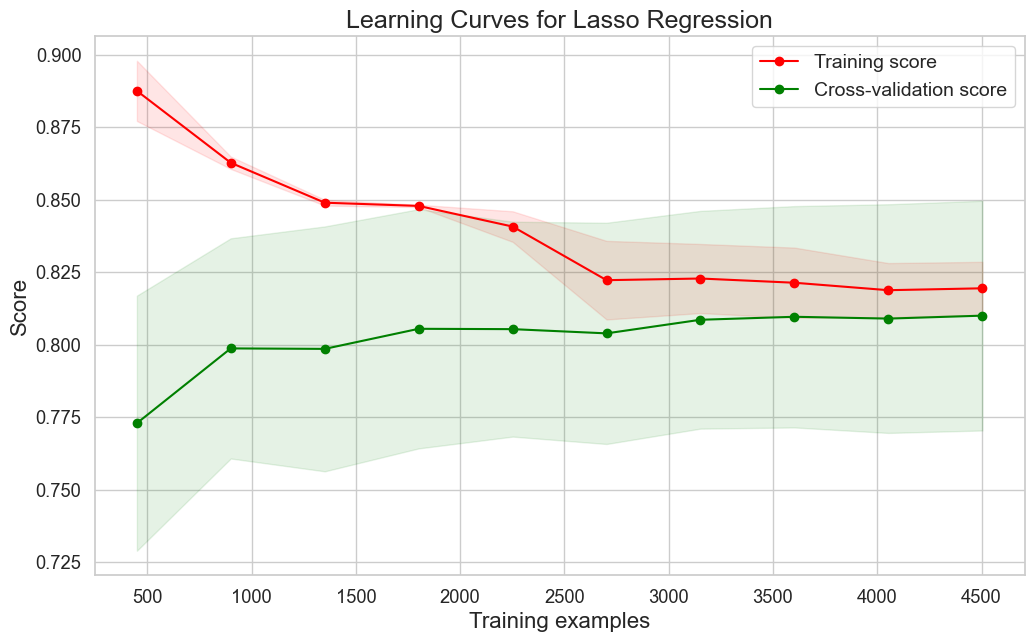

In [38]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Calculate residuals
residuals = y_test - predictions

# Histogram of Residuals
plt.figure(figsize=(12, 7))
sns.histplot(residuals, kde=True, color='skyblue', binwidth=1.0)
plt.title('Lasso Regression: Distribution of Residuals', fontsize=18)
plt.xlabel('Residuals', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(True)
plt.show()

# Scatter Plot of Predictions vs Actual
plt.figure(figsize=(12, 7))
sns.scatterplot(y_test, predictions, alpha=0.6, edgecolor='w', s=80, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.title('Lasso Regression: Actual vs. Predicted Prices', fontsize=18)
plt.xlabel('Actual Prices', fontsize=16)
plt.ylabel('Predicted Prices', fontsize=16)
plt.grid(True)
plt.show()

# Set up the Lasso regression model
lasso = Lasso(alpha=0.01)  # Adjust alpha as needed

# Settings for the learning curves
train_sizes, train_scores, test_scores = learning_curve(
    lasso, X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  
    scoring='r2', 
    n_jobs=-1  
)

# Calculate the average and standard deviation of the training and test set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="red")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="green")
plt.plot(train_sizes, train_scores_mean, 'o-', color="red", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="green", label="Cross-validation score")

plt.title("Learning Curves for Lasso Regression", fontsize=18)
plt.xlabel("Training examples", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True)
plt.show()

Random Forest Regression

In [39]:
random_forest = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score.append(random_forest.score(X_train,y_train))
test_score.append(random_forest.score(X_test,y_test))


MAE: 1.3494221963958875
MSE: 6.112103228573177
RMSE: 2.472266819858483
R2 Score: 0.937980247375837


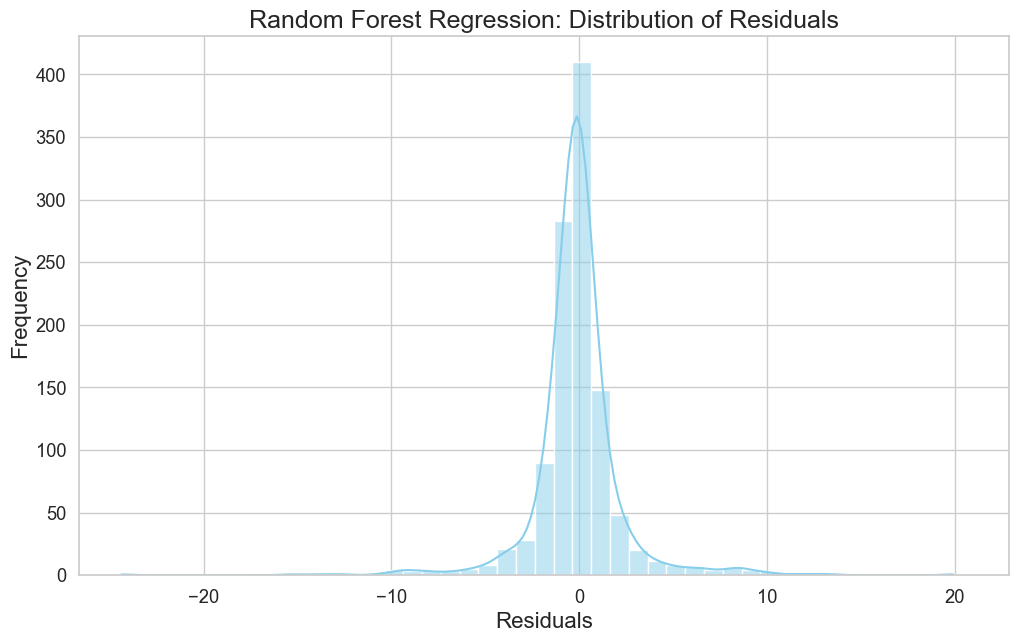

/Users/sunny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


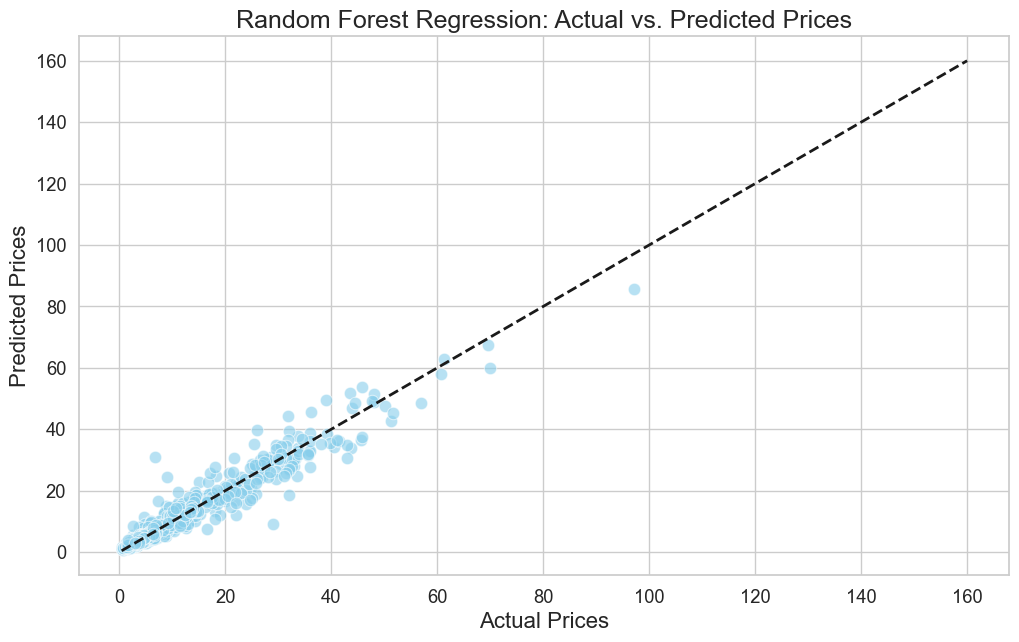

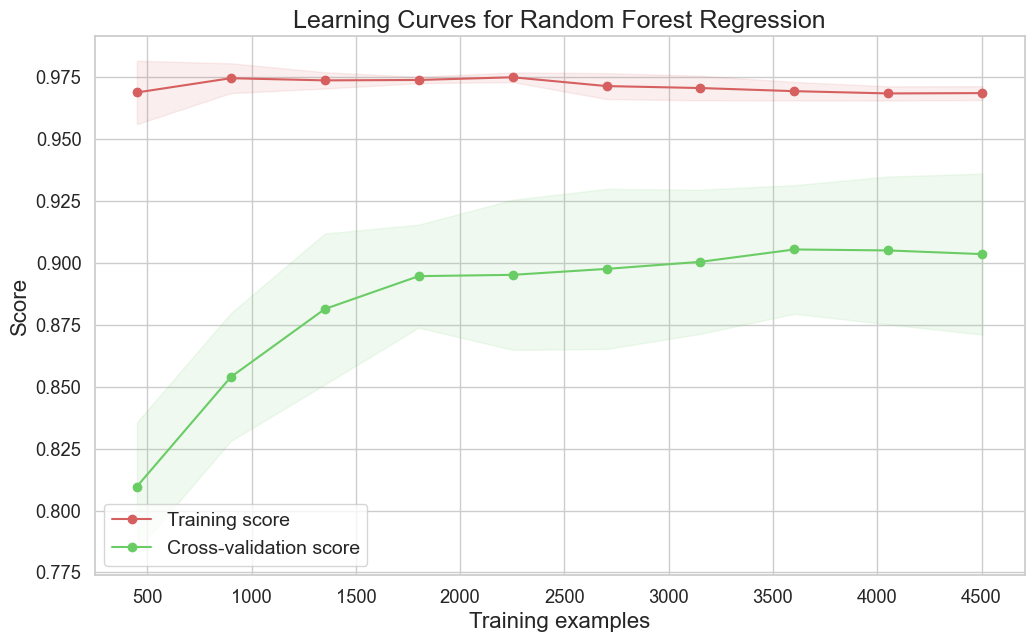

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Calculate residuals
residuals = y_test - predictions

# Histogram of Residuals
plt.figure(figsize=(12, 7))
sns.histplot(residuals, kde=True, color='skyblue', binwidth=1.0)
plt.title('Random Forest Regression: Distribution of Residuals', fontsize=18)
plt.xlabel('Residuals', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.grid(True)
plt.show()

# Scatter Plot of Predictions vs Actual
plt.figure(figsize=(12, 7))
sns.scatterplot(y_test, predictions, alpha=0.6, edgecolor='w', s=80, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Ideal line where predicted equals actual
plt.title('Random Forest Regression: Actual vs. Predicted Prices', fontsize=18)
plt.xlabel('Actual Prices', fontsize=16)
plt.ylabel('Predicted Prices', fontsize=16)
plt.grid(True)
plt.show()

# Settings for the learning curves
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=5),
    X, y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1  # Use all processors to speed up training
)

# Calculate the average and standard deviation of the training and test set scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves for Random Forest Regression", fontsize=18)
plt.xlabel("Training examples", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc="best", fontsize=14)
plt.grid(True)
plt.show()


In [41]:
model_names = ['Linear Regression','Ridge Regression','Lasso Regression','Random Forest Regression']

scores = pd.DataFrame([model_names,train_score,test_score])
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Test Set Accuracy']

scores

,Model,Training Set Accuracy,Test Set Accuracy
0,Linear Regression,0.833643,0.829888
1,Ridge Regression,0.833144,0.83099
2,Lasso Regression,0.667695,0.67459
3,Random Forest Regression,0.968093,0.93798


SVMs to create models that are more robust to these outliers. SVM will allow us to create predictions while minimizing the impact of outliers on our predictions.

In [42]:
CatCols = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission']

train_df = pd.get_dummies(train_df, columns=CatCols, drop_first=True)
train_df.head(5)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_audi,Company_bentley,Company_bmw,...,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,0,...,0,0,0,1,0,1,0,0,0,0


Mean Absolute Error: 2.0153622135568066
Mean Squared Error: 19.229524538463696


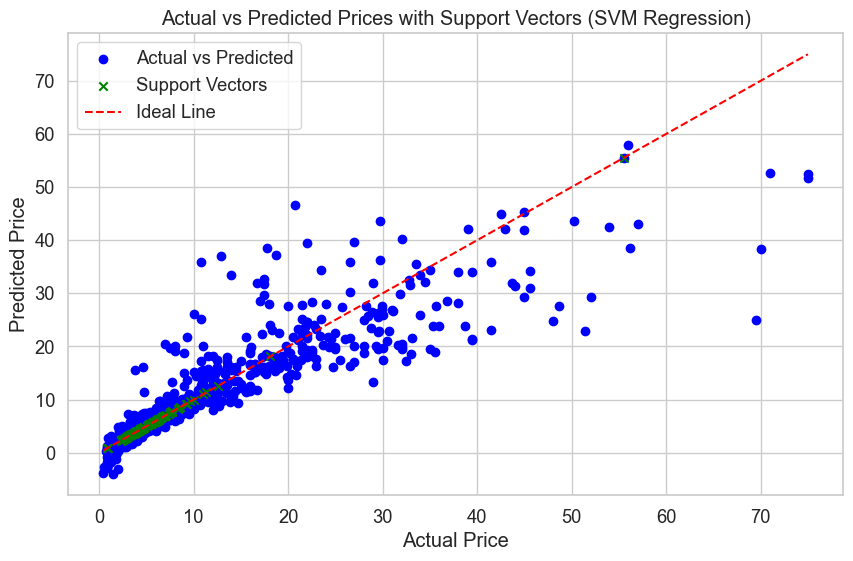

In [43]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = train_df.drop(columns=['Price'])
y = train_df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM regressor
svm_regressor = SVR(kernel='linear')  

# Train the SVM regressor
svm_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_regressor.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

# Predict labels for the test set
y_test_pred = svm_regressor.predict(X_test_scaled)

# Compute residuals
residuals = np.abs(y_test - y_test_pred)

# Identify instances with residuals within the margin (support vectors)
support_vectors_mask_test = np.where(residuals <= svm_regressor.epsilon)[0]

# Plot actual vs predicted prices with support vectors highlighted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.scatter(y_test.iloc[support_vectors_mask_test], y_pred[support_vectors_mask_test], color='green', marker='x', label='Support Vectors')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted Prices with Support Vectors (SVM Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid(True)
plt.show()

Linear SVR - Mean Absolute Error: 2.0153622135568066
Polynomial SVR - Mean Absolute Error: 3.385549231987917
RBF SVR - Mean Absolute Error: 2.4490789314242107


Linear SVR - Mean Squared Error: 19.229524538463696
Polynomial SVR - Mean Squared Error: 46.93316811521243
RBF SVR - Mean Squared Error: 37.578965884460764


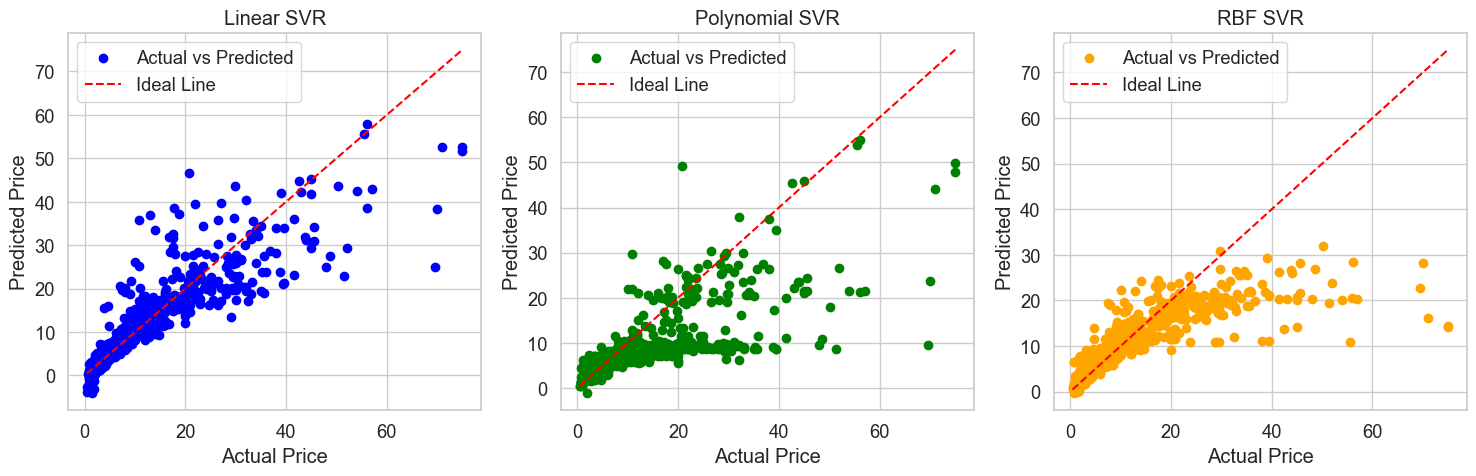

In [44]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = train_df.drop(columns=['Price'])
y = train_df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM regressors with different kernels
svm_linear = SVR(kernel='linear')
svm_poly = SVR(kernel='poly', degree=3)  # Polynomial kernel with degree 3
svm_rbf = SVR(kernel='rbf')  # Radial Basis Function kernel

# Train the SVM regressors
svm_linear.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_poly = svm_poly.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate the models
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)

print("Linear SVR - Mean Absolute Error:", mae_linear)
print("Polynomial SVR - Mean Absolute Error:", mae_poly)
print("RBF SVR - Mean Absolute Error:", mae_rbf)
print("\n")
print("Linear SVR - Mean Squared Error:", mse_linear)
print("Polynomial SVR - Mean Squared Error:", mse_poly)
print("RBF SVR - Mean Squared Error:", mse_rbf)

# Plot actual vs predicted prices for each SVR model
plt.figure(figsize=(15, 5))

# Linear SVR
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('Linear SVR')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()

# Polynomial SVR
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_poly, color='green', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('Polynomial SVR')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()

# RBF SVR
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rbf, color='orange', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('RBF SVR')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()

plt.tight_layout()
plt.show()

Clustering (k-means clustering). The goal of clustering in this context could be to group similar used cars based on their features, such as mileage, engine size, power, and other relevant characteristics. This can help in identifying patterns or segments within the market, which could be useful for various analyses, including targeted marketing, inventory management, or pricing strategies.

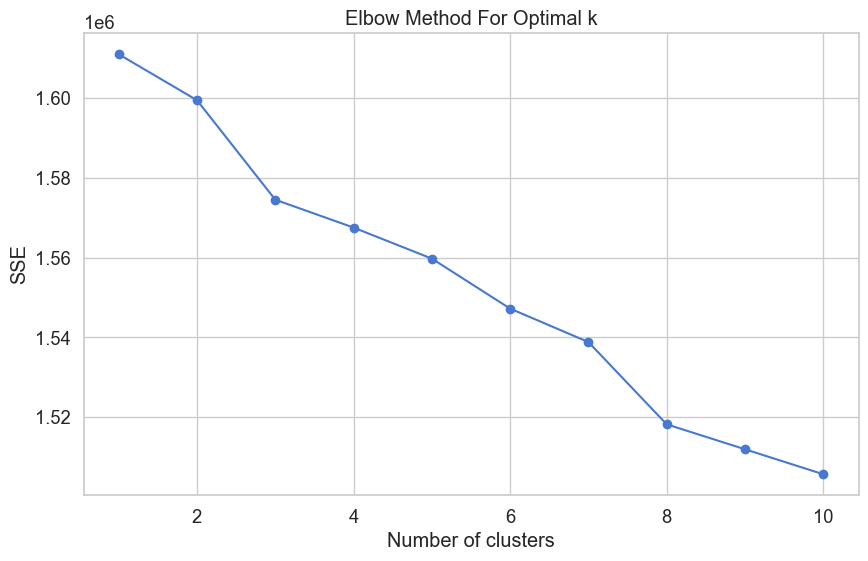


Cluster 0 Summary:


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_audi,Company_bentley,Company_bmw,...,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Cluster
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.000000,23.0,23.0,23.0,...,23.000000,23.0,23.000000,23.0,23.0,23.0,23.0,23.0,23.0,23.0
mean,2013.000000,60056.478261,8.473043,2766.826087,202.113913,5.0,30.417391,0.0,0.0,0.0,...,0.173913,0.0,0.086957,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,2.276361,25963.244017,6.655591,378.937228,31.818440,0.0,12.249032,0.0,0.0,0.0,...,0.387553,0.0,0.288104,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2009.000000,20000.000000,0.000000,2143.000000,165.000000,5.0,10.750000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,2012.000000,50500.000000,0.000000,2565.000000,165.000000,5.0,22.415000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,2013.000000,58589.000000,11.740000,2987.000000,203.200000,5.0,29.950000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,2015.000000,67500.000000,14.630000,2987.000000,224.170000,5.0,40.500000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,2016.000000,120000.000000,15.260000,2987.000000,254.800000,5.0,49.240000,0.0,0.0,0.0,...,1.000000,0.0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0



Cluster 1 Summary:


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_audi,Company_bentley,Company_bmw,...,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Cluster
count,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,...,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.000000,1915.0,1915.000000,1915.000000,1915.0
mean,2013.291906,63523.615144,14.789937,2302.437186,167.755334,5.751702,19.140057,0.122715,0.000522,0.138903,...,0.079896,0.002089,0.186423,0.018799,0.846997,0.001044,0.0,0.151436,0.348825,1.0
std,3.208028,38888.174979,3.445921,530.075334,57.180127,1.169005,15.181894,0.328196,0.022852,0.345936,...,0.271202,0.045667,0.389549,0.135850,0.360084,0.032309,0.0,0.358567,0.476723,0.0
min,1998.000000,1000.000000,0.000000,72.000000,41.000000,2.000000,0.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0
25%,2011.000000,37284.000000,12.700000,1968.000000,138.030000,5.000000,8.425000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.0
50%,2014.000000,57456.000000,14.530000,2179.000000,168.500000,5.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.0
75%,2016.000000,80730.500000,17.050000,2499.000000,187.740000,7.000000,25.215000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.0
max,2019.000000,299322.000000,27.030000,5998.000000,560.000000,10.000000,160.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0



Cluster 2 Summary:


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_audi,Company_bentley,Company_bmw,...,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Cluster
count,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.0,4073.0,4073.0,...,4073.000000,4073.000000,4073.000000,4073.000000,4073.000000,4073.0,4073.000000,4073.000000,4073.000000,4073.0
mean,2013.391358,54105.644243,19.763612,1293.897309,87.094780,5.059710,4.807896,0.0,0.0,0.0,...,0.114166,0.001228,0.149521,0.018905,0.382028,0.0,0.002455,0.602013,0.890498,2.0
std,3.304763,30651.152256,4.091385,253.699272,22.657392,0.396461,2.614945,0.0,0.0,0.0,...,0.318052,0.035020,0.356645,0.136206,0.485943,0.0,0.049495,0.489543,0.312306,0.0
min,1998.000000,171.000000,0.000000,624.000000,34.200000,2.000000,0.440000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.0
25%,2012.000000,32425.000000,17.210000,1197.000000,73.900000,5.000000,2.950000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.0
50%,2014.000000,51553.000000,19.500000,1248.000000,83.100000,5.000000,4.350000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,2.0
75%,2016.000000,70000.000000,22.540000,1497.000000,100.000000,5.000000,6.150000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,2.0
max,2019.000000,300000.000000,33.540000,2393.000000,198.250000,8.000000,35.000000,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2.0


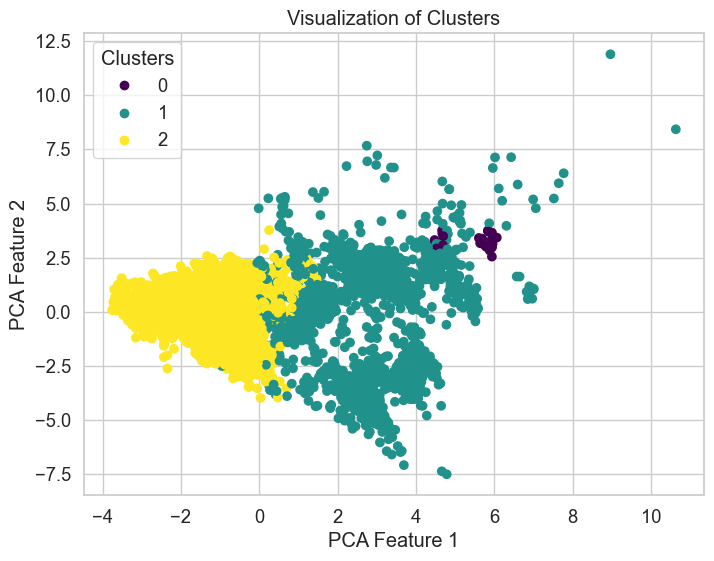

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = train_df.drop(columns='Price')  # Drop the target variable for clustering

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choosing the number of clusters using the Elbow method
sse = []
for k in range(1, 11):  # Test up to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot SSE for each *k*
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

# Assuming the elbow is at k=3 (example)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Assign clusters to the data
clusters = kmeans.labels_

# Analyze cluster centroids
centroids = kmeans.cluster_centers_

train_df['Cluster'] = clusters

# Summary of each cluster
for i in range(3):  # Assuming 3 clusters
    print(f"\nCluster {i} Summary:")
    display(train_df[train_df['Cluster'] == i].describe())

# Visualizing the clusters if possible
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('Visualization of Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


Gradient Descent with (Mean Squared Error (MSE), L1 Loss, Hinge Loss), Regularization to find the biggest factors in the resale price of a car. Create model that does not overfit to the data, providing a smoother prediction curve.

In [46]:
import numpy as np

# Define the Mean Squared Error Loss function with L2 Regularization
def mse_loss(y_true, y_pred, weights, lambda_reg):
    loss = np.mean((y_true - y_pred) ** 2) + lambda_reg * np.sum(weights ** 2)
    return loss

# Gradient of MSE with L2 Regularization
def gradients(X, y_true, y_pred, weights, lambda_reg):
    n = len(y_true)
    gradient = -2/n * np.dot(X.T, (y_true - y_pred)) + 2 * lambda_reg * weights
    return gradient

# Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, iterations=1000, lambda_reg=0.1):
    weights = np.random.rand(X.shape[1])
    bias = 0
    losses = []

    for i in range(iterations):
        y_pred = np.dot(X, weights) + bias
        loss = mse_loss(y, y_pred, weights, lambda_reg)
        losses.append(loss)

        # Update weights and bias
        grad_weights = gradients(X, y, y_pred, weights, lambda_reg)
        weights -= learning_rate * grad_weights
        bias -= learning_rate * -2 * np.mean(y - y_pred)

    return weights, bias, losses

# Assume X_train and y_train are already defined and preprocessed
weights, bias, losses = gradient_descent(X_train_scaled, y_train)

# Predicting
y_pred_train = np.dot(X_train_scaled, weights) + bias
y_pred_test = np.dot(X_test_scaled, weights) + bias

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R^2 Score:", r2_score(y_train, y_pred_train))
print("Test R^2 Score:", r2_score(y_test, y_pred_test))

Train MSE: 19.116616105837515
Test MSE: 17.45911765601745
Train R^2 Score: 0.853732653976125
Test R^2 Score: 0.8271537668973126


In [47]:
def mae_loss(y_true, y_pred, weights, lambda_reg):
    loss = np.mean(np.abs(y_true - y_pred)) + lambda_reg * np.sum(np.abs(weights))
    return loss

def gradients_mae(X, y_true, y_pred, weights, lambda_reg):
    n = len(y_true)
    # Use a sub-gradient of L1
    sub_gradient = np.sign(y_pred - y_true)
    gradient_weights = np.dot(X.T, sub_gradient) / n + lambda_reg * np.sign(weights)
    return gradient_weights

def gradient_descent_mae(X, y, learning_rate=0.01, iterations=1000, lambda_reg=0.1):
    weights = np.random.rand(X.shape[1])
    bias = 0
    losses = []

    for i in range(iterations):
        y_pred = np.dot(X, weights) + bias
        loss = mae_loss(y, y_pred, weights, lambda_reg)
        losses.append(loss)

        # Update weights and bias using sub-gradient
        grad_weights = gradients_mae(X, y, y_pred, weights, lambda_reg)
        weights -= learning_rate * grad_weights
        bias -= learning_rate * np.mean(np.sign(y_pred - y))

    return weights, bias, losses

In [48]:
def hyperparameter_tuning(X, y, learning_rates, lambdas, iterations=1000):
    best_score = float('inf')
    best_params = {}
    for lr in learning_rates:
        for lmbd in lambdas:
            weights, bias, losses = gradient_descent_mae(X, y, learning_rate=lr, iterations=iterations, lambda_reg=lmbd)
            y_pred = np.dot(X, weights) + bias
            score = mean_absolute_error(y, y_pred)
            if score < best_score:
                best_score = score
                best_params = {'learning_rate': lr, 'lambda': lmbd, 'weights': weights, 'bias': bias}
    print("Best MAE:", best_score)
    return best_params


In [49]:
# Evaluate model function
def evaluate_model(X_train, y_train, X_test, y_test, weights, bias):
    y_pred_train = np.dot(X_train, weights) + bias
    y_pred_test = np.dot(X_test, weights) + bias

    print("Training Metrics:")
    print("MSE:", mean_squared_error(y_train, y_pred_train))
    print("MAE:", mean_absolute_error(y_train, y_pred_train))
    print("R^2:", r2_score(y_train, y_pred_train))

    print("Testing Metrics:")
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("R^2:", r2_score(y_test, y_pred_test))

# Example usage:
params = hyperparameter_tuning(X_train_scaled, y_train, learning_rates=[0.01, 0.001], lambdas=[0.1, 0.01], iterations=500)
evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, params['weights'], params['bias'])


Best MAE: 5.663208208135573
Training Metrics:
MSE: 130.70200702668643
MAE: 5.663208208135573
R^2: -4.287275243863853e-05
Testing Metrics:
MSE: 104.39937226198128
MAE: 5.3667003017053965
R^2: -0.03355957553497935


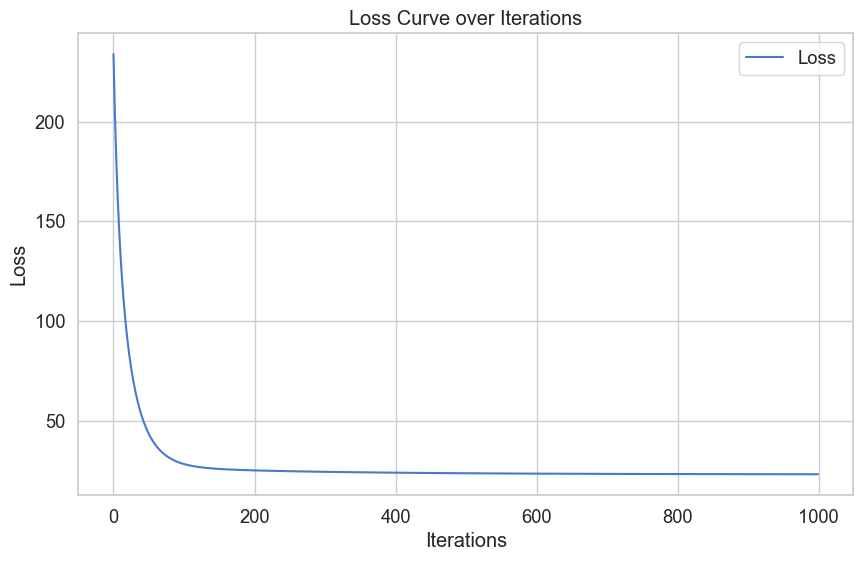

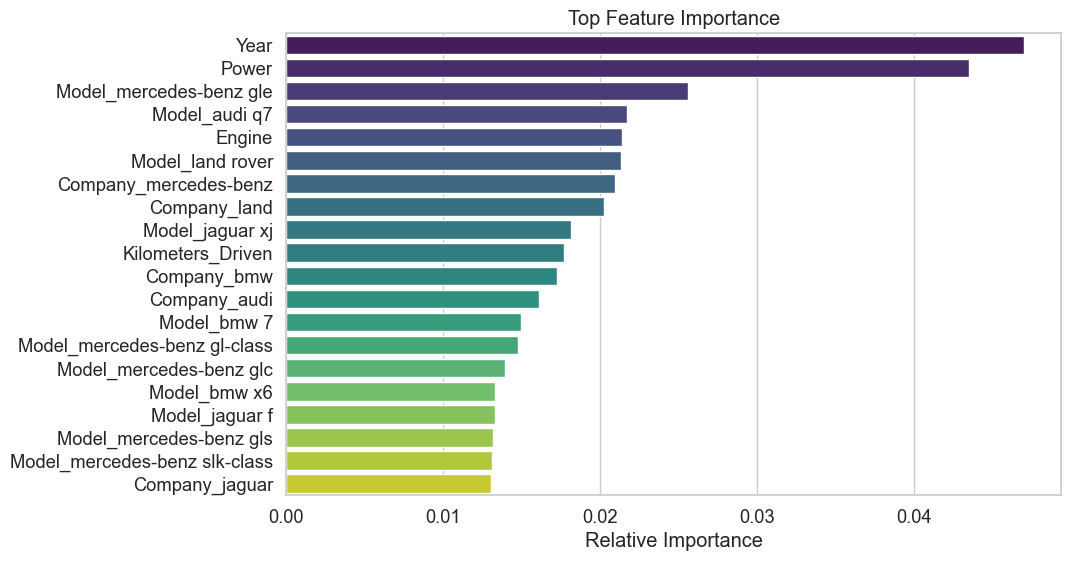

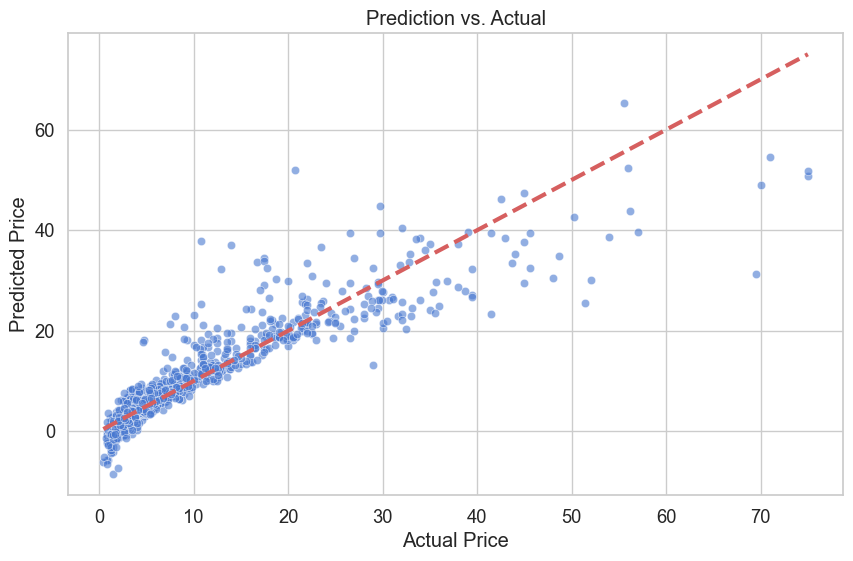

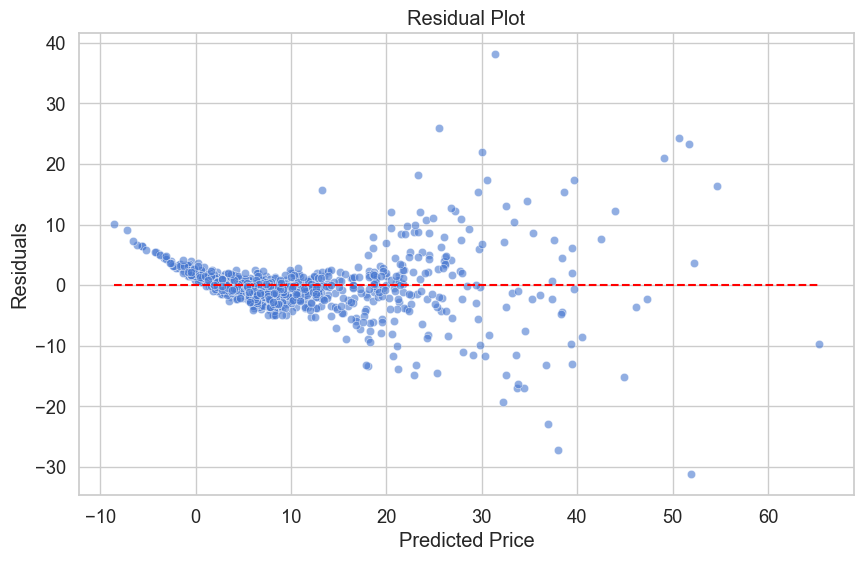

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'losses' is the list of losses from the gradient descent function
def plot_loss_curve(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(losses, label='Loss')
    plt.title('Loss Curve over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_feature_importance(weights, feature_names, top_n=20):
    # Normalize weights to sum to 1 for relative importance
    importance = np.abs(weights) / np.sum(np.abs(weights))
    # Get the indices of the features sorted by importance
    indices = np.argsort(importance)[-top_n:][::-1]
    top_features = feature_names[indices]
    top_importance = importance[indices]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_importance, y=top_features, palette='viridis')
    plt.title('Top Feature Importance')
    plt.xlabel('Relative Importance')
    plt.show()


# Prediction vs. Actual plot
def plot_predictions(y_true, y_pred, title='Prediction vs. Actual'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=3)  # Line showing perfect predictions
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(title)
    plt.show()

# Residual Plot
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
    plt.xlabel('Predicted Price')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

# Example usage:
plot_loss_curve(losses)
plot_feature_importance(weights, X_train.columns)
plot_predictions(y_test, y_pred_test)
plot_residuals(y_test, y_pred_test)
